**1. Download the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import seaborn as sb
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

**2. Image Augmentation**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
data = ImageDataGenerator(rescale = 1.0/225, zoom_range = 0.2, horizontal_flip = True, vertical_flip = False, validation_split = 0.25)

In [6]:
traindata = data.flow_from_directory('/content/drive/MyDrive/flowers', target_size=(224,224), class_mode = 'categorical', subset= 'training')

Found 3246 images belonging to 5 classes.


In [7]:
testdata = data.flow_from_directory('/content/drive/MyDrive/flowers',target_size=(224,224),class_mode = 'categorical', subset = 'validation')

Found 1081 images belonging to 5 classes.


In [8]:
traindata.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [9]:
testdata.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

**3.Create Model**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [11]:
model = Sequential()

**4. Adding Layers**

In [12]:
model.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [16]:
model.add(Dense(5,activation='softmax'))

**5. Compiling the model**

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**6. Fitting the model**

In [19]:
model.fit(traindata,steps_per_epoch=len(traindata),validation_data=testdata,validation_steps=len(testdata),epochs=15)

102/102 [==============================] - 825s 8s/step - loss: 3.2643 - accuracy: 0.4313 - val_loss: 1.2359 - val_accuracy: 0.4857
Epoch 2/15
102/102 [==============================] - 140s 1s/step - loss: 1.1214 - accuracy: 0.5558 - val_loss: 1.2356 - val_accuracy: 0.5301
Epoch 3/15
102/102 [==============================] - 144s 1s/step - loss: 1.0379 - accuracy: 0.5927 - val_loss: 1.1727 - val_accuracy: 0.5365
Epoch 4/15
102/102 [==============================] - 141s 1s/step - loss: 0.9630 - accuracy: 0.6269 - val_loss: 1.0327 - val_accuracy: 0.6022
Epoch 5/15
102/102 [==============================] - 141s 1s/step - loss: 0.8838 - accuracy: 0.6571 - val_loss: 1.0296 - val_accuracy: 0.6355
Epoch 6/15
102/102 [==============================] - 141s 1s/step - loss: 0.8191 - accuracy: 0.6987 - val_loss: 1.1384 - val_accuracy: 0.5920
Epoch 7/15
102/102 [==============================] - 144s 1s/step - loss: 0.7626 - accuracy: 0.7160 - val_loss: 0.9785 - val_accuracy: 0.6438
Epoch 8/15

**7. Saving the model**

In [20]:
model.save('flowers.h5')

**8. Testing the model**

**Test 1**

In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
tmodel = load_model('flowers.h5')

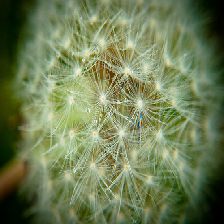

In [23]:
img = image.load_img('/content/drive/MyDrive/flowers/dandelion/10437652486_aa86c14985.jpg',target_size=(224,224))
img

In [24]:
arr = image.img_to_array(img)


In [25]:
dim = np.expand_dims(arr,axis=0)


In [26]:
temp=np.argmax(model.predict(dim),axis=1)


In [27]:
index = ['Daisy','Dandelion','Rose','Sunflower','Tulip']

In [28]:
index[temp[0]]

'Dandelion'

**Test 2**

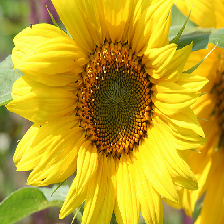

In [29]:
img2 = image.load_img('/content/drive/MyDrive/flowers/sunflower/9610374042_bb16cded3d.jpg',target_size=(224,224))
img2

In [30]:
arr2 = image.img_to_array(img2)


In [31]:
dim2 = np.expand_dims(arr2,axis=0)


In [32]:
temp2 = np.argmax(model.predict(dim2),axis=1)


In [33]:
index[temp2[0]]

'Sunflower'

**Test 3**

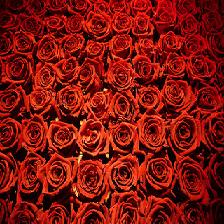

In [38]:
img3 = image.load_img('/content/drive/MyDrive/flowers/rose/388405293_4db1d71f21_n.jpg',target_size=(224,224))
img3

In [39]:
arr3 = image.img_to_array(img3)


In [40]:
dim3 = np.expand_dims(arr3,axis=0)


In [41]:
temp3 = np.argmax(model.predict(dim3),axis=1)


In [42]:
index[temp3[0]]

'Rose'

**Test 4**

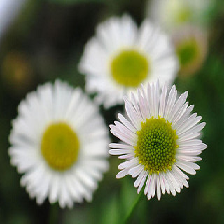

In [43]:
img4 = image.load_img('/content/drive/MyDrive/flowers/daisy/5794839_200acd910c_n.jpg',target_size=(224,224))
img4

In [44]:
arr4 = image.img_to_array(img4)


In [45]:
dim4 = np.expand_dims(arr4,axis=0)


In [46]:
temp4 = np.argmax(model.predict(dim4),axis=1)


In [47]:
index[temp4[0]]

'Daisy'

**Test 5**

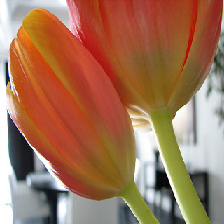

In [48]:
img5 = image.load_img('/content/drive/MyDrive/flowers/tulip/65347450_53658c63bd_n.jpg',target_size=(224,224))
img5

In [49]:
arr5 = image.img_to_array(img5)


In [50]:
dim5 = np.expand_dims(arr5,axis=0)


In [51]:
temp5 = np.argmax(model.predict(dim5),axis=1)


In [52]:
index[temp5[0]]

'Tulip'